In [194]:
import sys
missing_paths = ['/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/moabb-0.2.1-py3.6.egg']
for path in missing_paths:
    if path not in sys.path:   
        sys.path.append(path)

In [195]:
from moabb.datasets import BNCI2014001
from moabb.datasets import BNCI2015004
from moabb.datasets import AlexMI

In [196]:
import mne

In [197]:
import numpy as np
# from moabb.datasets import PhysionetMI
from moabb.paradigms import (LeftRightImagery, MotorImagery,
                             FilterBankMotorImagery)

In [198]:
paradigm = MotorImagery(n_classes=2)

Choosing from all possible events


In [199]:
dataset=BNCI2014001()
subjects=[1]
X, y, metadata = paradigm.get_data(dataset=dataset,subjects=subjects)

In [201]:
print(X.shape)
print(y.shape)

(288, 22, 1001)
(288,)


In [202]:
channels_selected=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22']
# channels_selected = ['C3','Cz','C4']

In [203]:
import pandas as pd
import numpy as np
import pickle
import math
import random
from statistics import mean
import statistics
from scipy.stats import skew
import math
import networkx as nx
from scipy.linalg import sqrtm
from scipy.signal import butter, lfilter
import scipy.io

In [204]:
sample_rate = 250
print(X.shape)
nchannels = 22
nsamples = 288
channel_names = ['Fz','2','3','4','5','6','7','C3','9','Cz','11','C4','13','14','15','16','17','18','19','Pz','21','22']
# channel_names=['C3','Cz','C4']
print(nchannels)

(288, 22, 1001)
22


In [205]:
cl_lab = ['right_hand','left_hand'] 
cl1 = cl_lab[0]
cl2 = cl_lab[1]
nclasses = len(cl_lab)

In [206]:
trials = {}
win = np.arange(int(3.5*sample_rate), int(6.0*sample_rate))
print(len(win))

625


In [207]:
# Length of the time window
nsamples = 1001
# Extract the onsets for the class
cl_onsets_right = 0
cl_onsets_left = 0
for ind,yi in enumerate(y):
#     print(yi)
    if yi=='right_hand':
        cl_onsets_right+=1
    if yi=='left_hand':
        cl_onsets_left+=1
print(cl_onsets_left)
trials['right_hand'] = np.zeros((nchannels, nsamples, cl_onsets_right))
trials['left_hand'] = np.zeros((nchannels, nsamples, cl_onsets_left))
left_ind=0
right_ind=0
# print(X.shape)
# print(y.shape)
for ind,yi in enumerate(y):
    if yi=='right_hand':
        trials['right_hand'][:,:,right_ind] = X[ind, :,:]
        right_ind+=1
    if yi=='left_hand':
        trials['left_hand'][:,:,left_ind] = X[ind, :,:]
        left_ind+=1

144


In [208]:
print(trials['left_hand'].shape)

(22, 1001, 144)


In [209]:
from matplotlib import mlab

def psd(trials):
    '''
    Calculates for each trial the Power Spectral Density (PSD).
    
    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEG signal
    
    Returns
    -------
    trial_PSD : 3d-array (channels x PSD x trials)
        the PSD for each trial.  
    freqs : list of floats
        Yhe frequencies for which the PSD was computed (useful for plotting later)
    '''
    
    ntrials = trials.shape[2]
    trials_PSD = np.zeros((nchannels, 501, ntrials))

    # Iterate over trials and channels
    for trial in range(ntrials):
        for ch in range(nchannels):
            # Calculate the PSD
            (PSD, freqs) = mlab.psd(trials[ch,:,trial], NFFT=int(nsamples), Fs=sample_rate)
            trials_PSD[ch, :, trial] = PSD.ravel()
                
    return trials_PSD, freqs

In [210]:
# Apply the function
psd_r, freqs = psd(trials[cl1])
psd_f, freqs = psd(trials[cl2])
trials_PSD = {cl1: psd_r, cl2: psd_f}
print(psd_r.shape)

(22, 501, 144)


In [211]:
import matplotlib.pyplot as plt

def plot_psd(trials_PSD, freqs, chan_ind, chan_lab=None, maxy=None):
    '''
    Plots PSD data calculated with psd().
    
    Parameters
    ----------
    trials : 3d-array
        The PSD data, as returned by psd()
    freqs : list of floats
        The frequencies for which the PSD is defined, as returned by psd() 
    chan_ind : list of integers
        The indices of the channels to plot
    chan_lab : list of strings
        (optional) List of names for each channel
    maxy : float
        (optional) Limit the y-axis to this value
    '''
    plt.figure(figsize=(12,5))
    
    nchans = len(chan_ind)
    
    # Maximum of 3 plots per row
    nrows = np.ceil(nchans / 3)
    ncols = min(3, nchans)
    
    # Enumerate over the channels
    for i,ch in enumerate(chan_ind):
        # Figure out which subplot to draw to
        plt.subplot(nrows,ncols,i+1)
    
        # Plot the PSD for each class
        for cl in trials.keys():
            plt.plot(freqs, np.mean(trials_PSD[cl][ch,:,:], axis=1), label=cl)
    
        # All plot decoration below...
        
        plt.xlim(1,30)
        
        if maxy != None:
            plt.ylim(0,maxy)
    
        plt.grid()
    
        plt.xlabel('Frequency (Hz)')
        
        if chan_lab == None:
            plt.title('Channel %d' % (ch+1))
        else:
            plt.title(chan_lab[i])

        plt.legend()
        
    plt.tight_layout()

/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


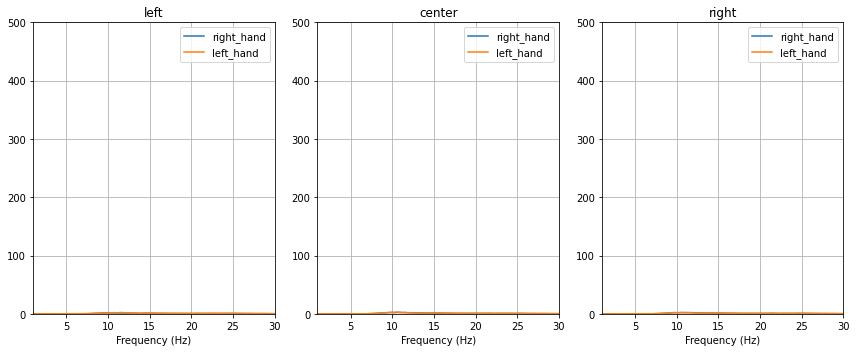

In [212]:
plot_psd(
    trials_PSD,
    freqs,
    [channel_names.index(ch) for ch in ['C3', 'Cz', 'C4']],
    chan_lab=['left', 'center', 'right'],
    maxy=500
)

In [213]:
import scipy.signal 

def bandpass(trials, lo, hi, sample_rate):
    '''
    Designs and applies a bandpass filter to the signal.
    
    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEGsignal
    lo : float
        Lower frequency bound (in Hz)
    hi : float
        Upper frequency bound (in Hz)
    sample_rate : float
        Sample rate of the signal (in Hz)
    
    Returns
    -------
    trials_filt : 3d-array (channels x samples x trials)
        The bandpassed signal
    '''

    # The iirfilter() function takes the filter order: higher numbers mean a sharper frequency cutoff,
    # but the resulting signal might be shifted in time, lower numbers mean a soft frequency cutoff,
    # but the resulting signal less distorted in time. It also takes the lower and upper frequency bounds
    # to pass, divided by the niquist frequency, which is the sample rate divided by 2:
    a, b = scipy.signal.iirfilter(6, [lo/(sample_rate/2.0), hi/(sample_rate/2.0)])

    # Applying the filter to each trial
    ntrials = trials.shape[2]
    trials_filt = np.zeros((nchannels, nsamples, ntrials))
    for i in range(ntrials):
        trials_filt[:,:,i] = scipy.signal.filtfilt(a, b, trials[:,:,i], axis=1)
    
    return trials_filt

In [214]:
# Apply the function
trials_filt = {cl1: bandpass(trials[cl1], 8, 15, sample_rate),
               cl2: bandpass(trials[cl2], 8, 15, sample_rate)}

/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


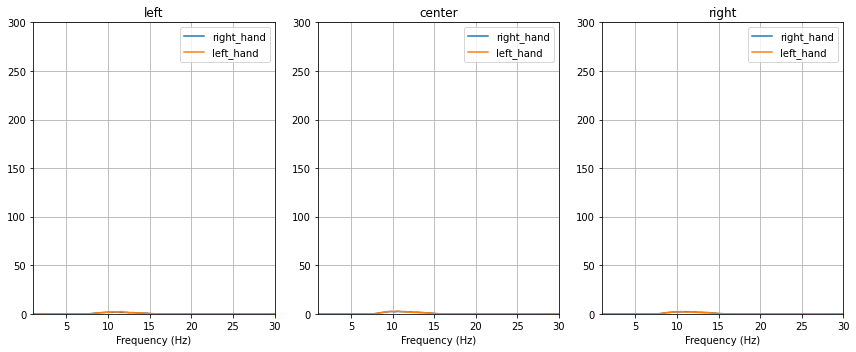

In [215]:
psd_r, freqs = psd(trials_filt[cl1])
psd_f, freqs = psd(trials_filt[cl2])
trials_PSD = {cl1: psd_r, cl2: psd_f}

plot_psd(
    trials_PSD,
    freqs,
    [channel_names.index(ch) for ch in ['C3', 'Cz', 'C4']],
    chan_lab=['left', 'center', 'right'],
    maxy=300
)

In [216]:
# Calculate the log(var) of the trials
def logvar(trials):
    '''
    Calculate the log-var of each channel.
    
    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEG signal.
        
    Returns
    -------
    logvar - 2d-array (channels x trials)
        For each channel the logvar of the signal
    '''
#     print(np.log(np.var(trials[0], axis=1)).shape)
    return np.log(np.var(trials, axis=1))

In [217]:
# Apply the function
trials_logvar = {cl1: logvar(trials_filt[cl1]),
                 cl2: logvar(trials_filt[cl2])}
print(trials_logvar)
print(trials_logvar['right_hand'].shape)

{'right_hand': array([[2.12258914, 2.35425297, 2.67366112, ..., 2.24042572, 2.2831469 ,
        2.72724945],
       [1.77521161, 2.13564098, 2.49817854, ..., 2.28554482, 2.05136907,
        2.50517601],
       [2.0425451 , 2.40301367, 2.7121879 , ..., 2.33203006, 2.23139188,
        2.72775256],
       ...,
       [2.41325938, 2.39762043, 2.61707588, ..., 2.50678255, 2.38459787,
        2.56273165],
       [2.31417153, 2.37020253, 2.71963753, ..., 2.54166081, 2.44222373,
        2.39876211],
       [2.28003133, 2.57984798, 2.8154691 , ..., 2.59303932, 2.7073709 ,
        2.73447633]]), 'left_hand': array([[2.54318901, 2.06853731, 3.11615764, ..., 2.13130272, 2.39956467,
        2.21431334],
       [2.62093941, 1.994503  , 2.96340963, ..., 2.00289061, 2.2898885 ,
        1.99926383],
       [2.70045548, 1.97528904, 2.97397443, ..., 2.1994292 , 2.47474002,
        2.21761606],
       ...,
       [2.71266585, 2.35280181, 2.83027997, ..., 2.391827  , 2.64558102,
        2.10126652],
      

In [218]:
def plot_logvar(trials):
    '''
    Plots the log-var of each channel/component.
    arguments:
        trials - Dictionary containing the trials (log-vars x trials) for 2 classes.
    '''
    plt.figure(figsize=(12,5))
    
    x0 = np.arange(nchannels)
    x1 = np.arange(nchannels) + 0.4

    y0 = np.mean(trials[cl1], axis=1)
    y1 = np.mean(trials[cl2], axis=1)

    plt.bar(x0, y0, width=0.5, color='b')
    plt.bar(x1, y1, width=0.4, color='r')

    plt.xlim(-0.5, nchannels+0.5)

    plt.gca().yaxis.grid(True)
    plt.title('log-var of each channel/component')
    plt.xlabel('channels/components')
    plt.ylabel('log-var')
    plt.legend(cl_lab)

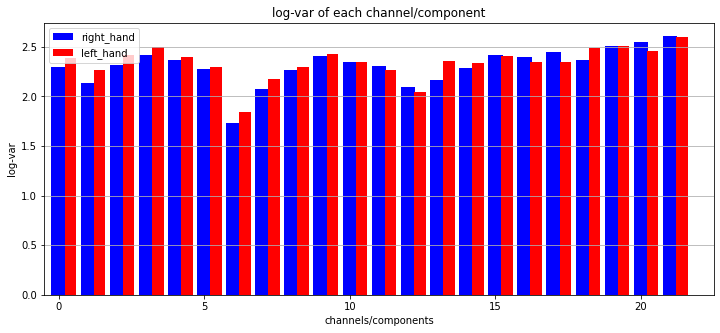

In [219]:
# Plot the log-vars
plot_logvar(trials_logvar)

In [220]:
from numpy import linalg

def cov(trials):
    ''' Calculate the covariance for each trial and return their average '''
    ntrials = trials.shape[2]
    covs = [ trials[:,:,i].dot(trials[:,:,i].T) / nsamples for i in range(ntrials) ]
    return np.mean(covs, axis=0)

def whitening(sigma):
    ''' Calculate a whitening matrix for covariance matrix sigma. '''
    U, l, _ = linalg.svd(sigma)
    return U.dot( np.diag(l ** -0.5) )

def csp(trials_r, trials_f):
    '''
    Calculate the CSP transformation matrix W.
    arguments:
        trials_r - Array (channels x samples x trials) containing right hand movement trials
        trials_f - Array (channels x samples x trials) containing foot movement trials
    returns:
        Mixing matrix W
    '''
    cov_r = cov(trials_r)
#     print(cov_r)
    cov_f = cov(trials_f)
    P = whitening(cov_r + cov_f)
    B, _, _ = linalg.svd( P.T.dot(cov_f).dot(P) )
    W = P.dot(B)
    return W

def apply_mix(W, trials):
    ''' Apply a mixing matrix to each trial (basically multiply W with the EEG signal matrix)'''
    ntrials = trials.shape[2]
    trials_csp = np.zeros((nchannels, nsamples, ntrials))
    for i in range(ntrials):
        trials_csp[:,:,i] = W.T.dot(trials[:,:,i])
    return trials_csp

In [221]:
# Apply the functions
W = csp(trials_filt[cl1], trials_filt[cl2])
trials_csp = {cl1: apply_mix(W, trials_filt[cl1]),
              cl2: apply_mix(W, trials_filt[cl2])}
print(trials_csp[cl1].shape)

(22, 1001, 144)


In [223]:
y_list=[]
j=0
for i in range(trials_csp[cl1].shape[2]):
    single = trials_csp[cl1][:,:,i].T
    df = pd.DataFrame(data=single,columns=channel_names)
#     df=df[channels_selected].T
    a = np.array(df)
    print(a.shape)
    np.savetxt("/home/shukra/Desktop/MTP/MI Data/PLI_input/BNCI-2014-001/Subject-9"+"/Data/sub9-"+str(j)+".csv", a.T, delimiter = ",")
    j+=1
    y_list.append(0)
for i in range(trials_csp[cl2].shape[2]):
    single = trials_csp[cl2][:,:,i].T
#     print(single.shape)
    df = pd.DataFrame(data=single,columns=channel_names)
#     print(df)
#     df=df[channels_selected].T
#     print(df.shape)
    a = np.array(df)
    print(a.shape)
    np.savetxt("/home/shukra/Desktop/MTP/MI Data/PLI_input/BNCI-2014-001/Subject-9"+"/Data/sub9-"+str(j)+".csv", a.T, delimiter = ",")
    j+=1
    y_list.append(1)
np.array(y_list).tofile('/home/shukra/Desktop/MTP/MI Data/PLI_input/BNCI-2014-001/Subject-9/Label/subject-9'+'.csv', sep = ',')

(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)
(1001, 22)

In [224]:
print(len(y_list))

288


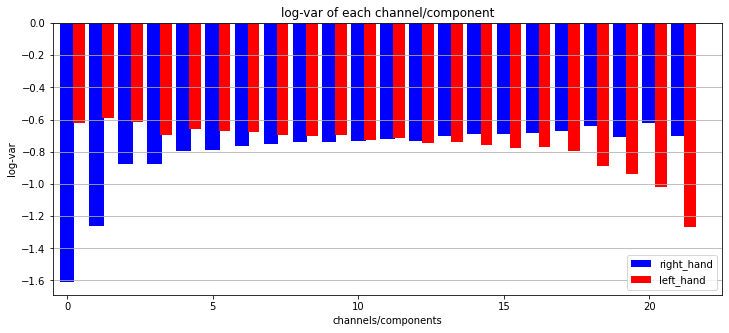

In [225]:
trials_logvar = {cl1: logvar(trials_csp[cl1]),
                 cl2: logvar(trials_csp[cl2])}
plot_logvar(trials_logvar)

/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


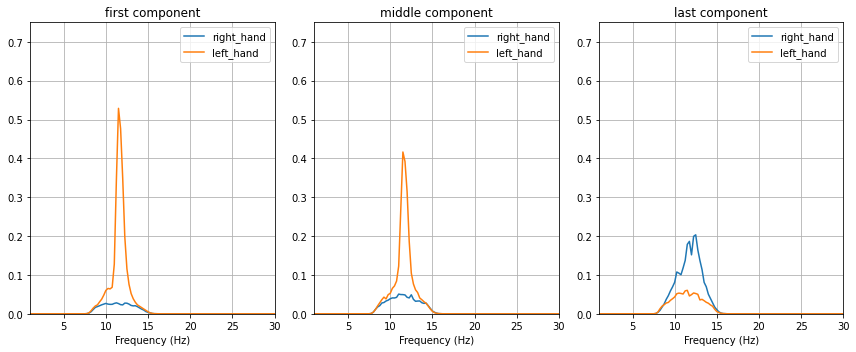

In [226]:
psd_r, freqs = psd(trials_csp[cl1])
psd_f, freqs = psd(trials_csp[cl2])
trials_PSD = {cl1: psd_r, cl2: psd_f}

plot_psd(trials_PSD, freqs, [0,1,-1], chan_lab=['first component', 'middle component', 'last component'], maxy=0.75 )


In [227]:
def plot_scatter(left, foot):
    plt.figure()
    plt.scatter(left[0,:], left[-1,:], color='b')
    plt.scatter(foot[0,:], foot[-1,:], color='r')
    plt.xlabel('Last component')
    plt.ylabel('First component')
    plt.legend(cl_lab)

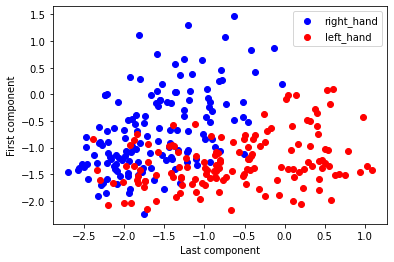

In [228]:
plot_scatter(trials_logvar[cl1], trials_logvar[cl2])


In [229]:
ntrials = trials_csp[cl1].shape[2]
input_list=[]
tmp=0
for i in range(ntrials):
    data = trials_csp[cl1][:,:,i].T
    df = pd.DataFrame(data=data,columns=channel_names)
#     print(df)
    pearsonCorrelation={}
    #adJMatrix=[]
    for i in channel_names:
        #matrix_list=[]
        for j in channel_names:
            x=df[i]
            x_t=np.array(x).T
            y=df[j]
            y_t=np.array(y).T
            r=np.corrcoef(x_t,y_t)
            pearsonCorrelation[(i,j)]=r[0,1]
    partialCorrelation=dict()
    # adJMatrix is to store the Ajencency matrix
    adJMatrix=[]
    features_total=[]
    for i in channel_names:
        matrix_list=[]
        features=[]
#         print(df[i])
        features.append(mean(df[i]))
        features.append(statistics.median(df[i]))
        features.append(np.std(np.array(df[i]).T, dtype = np.float64))
        features.append(skew(df[i]))
        features_total.append(features)
        for j in channel_names:
            list=[]
            i_j=pearsonCorrelation[(i,j)]
            for k in channel_names:
                if k is not i and k is not j:
                    j_k=pearsonCorrelation[(j,k)]
                    i_k=pearsonCorrelation[(i,k)]
                    partial_corr=((i_j-(j_k*i_k))/math.sqrt((1-i_k*i_k)*(1-j_k*j_k)))
                    list.append(partial_corr)
            if min(list)>0.3:
                partialCorrelation[(i,j)]=min(list)
                matrix_list.append(1)
            else:
                partialCorrelation[(i,j)]=0
                matrix_list.append(0)
        adJMatrix.append(matrix_list)
    input_list.append([adJMatrix, 0,features_total])
    print(tmp)
    tmp+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143


In [230]:
ntrials = trials_csp[cl2].shape[2]
for i in range(ntrials):
    data = trials_csp[cl2][:,:,i].T
    df = pd.DataFrame(data=data,columns=channel_names)
    pearsonCorrelation={}
    #adJMatrix=[]
    for i in channel_names:
        #matrix_list=[]
        for j in channel_names:
            x=df[i]
            x_t=np.array(x).T
            y=df[j]
            y_t=np.array(y).T
            r=np.corrcoef(x_t,y_t)
            pearsonCorrelation[(i,j)]=r[0,1]
    partialCorrelation=dict()
    # adJMatrix is to store the Ajencency matrix
    adJMatrix=[]
    features_total=[]
    for i in channel_names:
        matrix_list=[]
        features=[]
        features.append(mean(df[i]))
        features.append(statistics.median(df[i]))
        features.append(np.std(np.array(df[i]).T, dtype = np.float64))
        features.append(skew(df[i]))
        features_total.append(features)
        for j in channel_names:
            list=[]
            i_j=pearsonCorrelation[(i,j)]
            for k in channel_names:
                if k is not i and k is not j:
                    j_k=pearsonCorrelation[(j,k)]
                    i_k=pearsonCorrelation[(i,k)]
                    partial_corr=((i_j-(j_k*i_k))/math.sqrt((1-i_k*i_k)*(1-j_k*j_k)))
                    list.append(partial_corr)
            if min(list)>0.3:
                partialCorrelation[(i,j)]=min(list)
                matrix_list.append(1)
            else:
                partialCorrelation[(i,j)]=0
                matrix_list.append(0)
        adJMatrix.append(matrix_list)
    input_list.append([adJMatrix, 1,features_total])
    print(tmp)
    tmp+=1

144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287


In [231]:
f = open("Bandpass+CSP+GNN_BNCI2014-002-1-PC", "wb")
random.shuffle(input_list)
pickle.dump(input_list, f)
f.close()

In [232]:
print(np.array(input_list).shape)

(288, 3)


/home/shukra/anaconda3/envs/test-1/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
